In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("product_data.csv")
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [2]:
data.sample(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
920,T1000921,290,S1,L1,R3,2018-01-03,0,Yes,60,47040.00
24115,T1024116,163,S1,L2,R3,2018-03-08,0,No,54,34773.00
30091,T1030092,120,S3,L2,R2,2018-03-24,0,No,64,41502.00
113759,T1113760,149,S2,L3,R2,2018-11-08,1,No,7,4659.75
157726,T1157727,324,S1,L2,R3,2019-03-09,0,No,56,36072.00


In [3]:
data.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [6]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


- Product ID
- Store ID
- The type of store where the supplement was sold
- The type of location the order was received from
- Sales Date
- Region code
- Whether it is a public holiday or not at the time of order
- Whether the product was on discount or not
- Number of orders placed
- Sales

- Now let’s explore some of the important features from this dataset to know about the factors affecting the number of orders for supplements

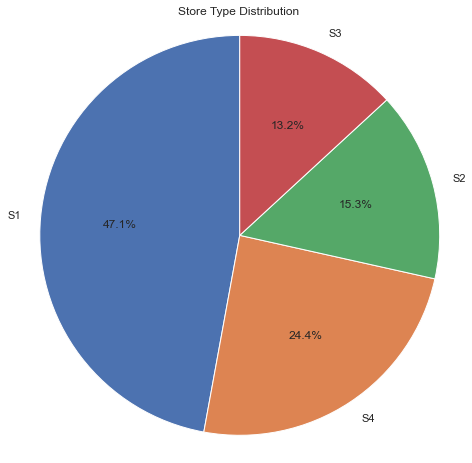

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data

# Calculate the value counts
pie = data["Store_Type"].value_counts()
store = pie.index
orders = pie.values

# Create a pie chart using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(orders, labels=store, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Store Type Distribution')
plt.show()


- The above figure shows the distribution of the number of orders received according to the store type. Now let’s have a look at the distribution of the number of orders, according to the location

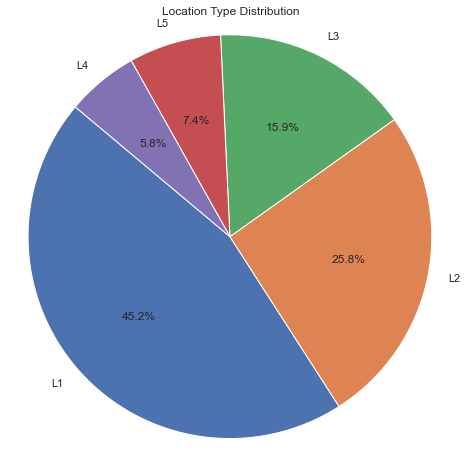

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the location data

# Calculate the value counts
pie2 = data["Location_Type"].value_counts()
location = pie2.index
orders = pie2.values

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(orders, labels=location, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Location Type Distribution")
plt.show()


- The above figure shows the distribution of the number of orders received according to the location. Now let’s have a look at the distribution of the number of orders, according to the discount

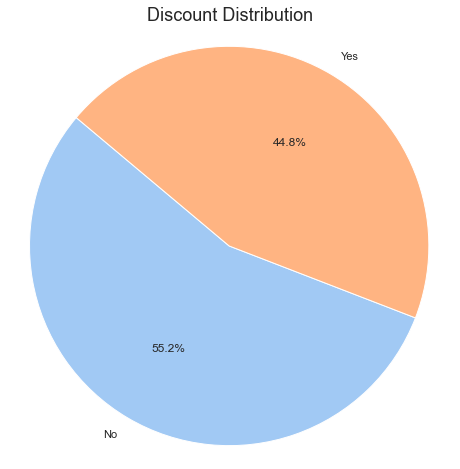

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated pie3, discount, and orders

pie3 = data["Discount"].value_counts()
discount = pie3.index
orders = pie3.values

# Creating a pie chart using Matplotlib and Seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(orders, labels=discount, autopct='%1.1f%%', startangle=140)
plt.title('Discount Distribution',fontsize = 18)

# Show the pie chart
plt.axis('equal')  
plt.show()


- According to the above figure, most people still buy supplements if there is no discount on them. Now let’s have a look at how holidays affect the number of orders

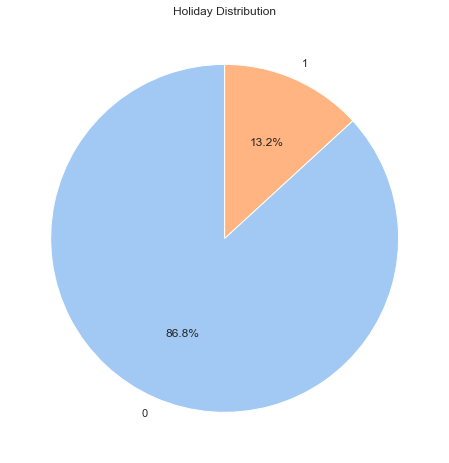

In [10]:
pie4 = data["Holiday"].value_counts()
holiday = pie4.index
orders = pie4.values

# Create a figure and axis
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(orders, labels=holiday, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Holiday Distribution")

# Display the chart
plt.show()



- According to the above figure, most of the people buy supplements in working days

# Number of Orders Prediction Model
- Now let’s prepare the data so that we can train a machine learning model for the task of the number of orders prediction. Here, I will change some of the string values to numerical values:

In [11]:
data["Discount"] = data["Discount"].map({"No": 0, "Yes": 1})
data["Store_Type"] = data["Store_Type"].map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
data["Location_Type"] = data["Location_Type"].map({"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5})
data.dropna()

x = np.array(data[["Store_Type", "Location_Type", "Holiday", "Discount"]])
y = np.array(data["#Order"])

- Now let’s split the data into 80% training set and 20% test set

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

- Now I will be using the light gradient boosting regression algorithm to train the model

In [15]:
# Use pip install lightgbm to install it on your system
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 4
[LightGBM] [Info] Start training from score 68.163401


LGBMRegressor()

- Now let’s have a look at the predicted values

In [17]:
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Orders": ypred.flatten()})
data.head()

,Predicted Orders
0,47.351897
1,97.068717
2,66.577788
3,85.143083
4,54.451098


In [20]:
data['Predicted Orders'] = data['Predicted Orders'].astype(int)

In [21]:
data

,Predicted Orders
0,47
1,97
2,66
3,85
4,54
...,...
37663,66
37664,47
37665,47
37666,61


In [23]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(xtest)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, y_pred)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(ytest, y_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = mean_squared_error(ytest, y_pred, squared=False)

# Calculating R-squared (R^2)
r2 = r2_score(ytest, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 13.38
Mean Squared Error (MSE): 379.05
Root Mean Squared Error (RMSE): 19.47
R-squared (R^2): 0.59
